<a href="https://colab.research.google.com/github/jewelry715/likelion/blob/main/cnn%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()
print(len(train_x),len(test_x))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


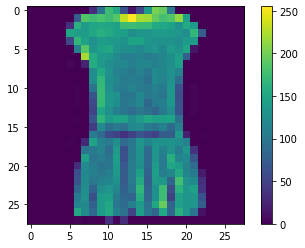

정답 범주:  3


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[3])
plt.colorbar()
plt.show()
print('정답 범주: ',train_y[3])

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
model=tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(units=128,activation='relu'),
      tf.keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',#별도의 데이터 처리 없이 희소행렬을 나타내는 데이터를 정답행렬로 사용
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_x,train_y,epochs=500,validation_split=0.25,
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 8s 3ms/step - loss: 0.5210 - accuracy: 0.8176 - val_loss: 0.4197 - val_accuracy: 0.8507
Epoch 2/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3933 - accuracy: 0.8594 - val_loss: 0.3861 - val_accuracy: 0.8606
Epoch 3/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3542 - accuracy: 0.8707 - val_loss: 0.3490 - val_accuracy: 0.8757
Epoch 4/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3252 - accuracy: 0.8808 - val_loss: 0.3402 - val_accuracy: 0.8782
Epoch 5/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3058 - accuracy: 0.8888 - val_loss: 0.3463 - val_accuracy: 0.8735
Epoch 6/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2877 - accuracy: 0.8947 - val_loss: 0.3400 - val_accuracy: 0.8767
Epoch 7/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2753 - accuracy: 0.8984 - val_loss: 0.3254 - val_ac

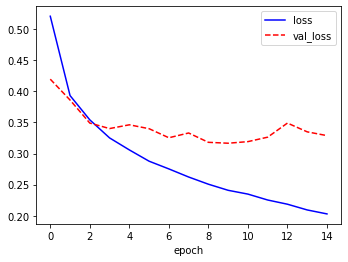

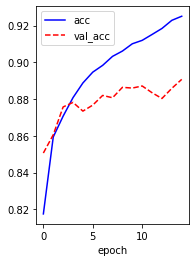

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='acc')
plt.plot(history.history['val_accuracy'],'r--',label='val_acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8843


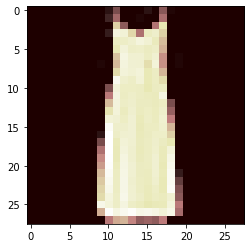

In [ ]:
model.evaluate(test_x,test_y)
pred_x=model.predict(test_x[[13]])
plt.imshow(test_x[13],cmap='pink')
plt.show()
#예측 수행

In [ ]:
#예측결과 확인
import numpy as np
pred_x_argmax=np.argmax(pred_x)
correct=np.equal(pred_x_argmax,test_y[13])
print("신경망의 예측 확률분포 \n {}".format(pred_x + 1))
print("\n 예측 범주:{} 실제 범주:{} → 일치 여부 {}".format(pred_x_argmax, test_y[13], correct))

신경망의 예측 확률분포 
 [[1.0000064 1.000268  1.0000014 1.9996372 1.000005  1.        1.0000005
  1.        1.0000814 1.       ]]

 예측 범주:3 실제 범주:3 → 일치 여부 True


In [ ]:
print(train_x.shape,test_x.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
train_x=train_x.reshape(-1,28,28,1)
test_x=test_x.reshape(-1,28,28,1)
print(train_x.shape,test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


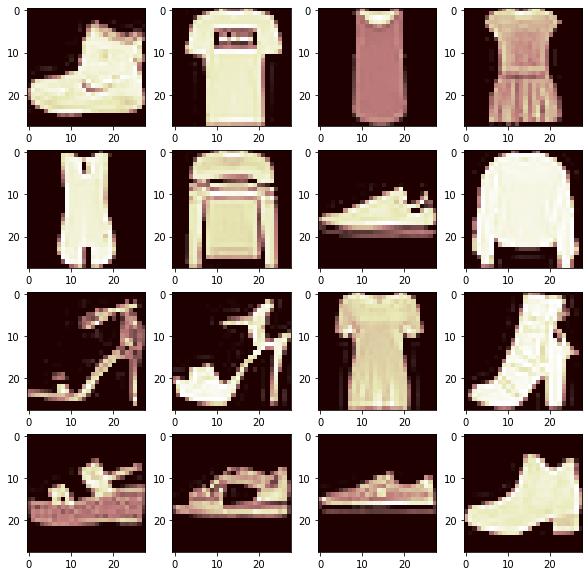

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_x[i].reshape(28,28),cmap='pink')
plt.show()
print(train_y[:16])

In [ ]:
train_x[0].shape

(28, 28, 1)

## 다층 퍼셉트론

In [ ]:
model=tf.keras.Sequential([
          tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),
          filters=16,strides=(1,1),padding='valid'),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=128,activation='relu'),
          tf.keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

In [ ]:
history=model.fit(train_x,train_y,epochs=500,validation_split=0.25,
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,
                                                monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 40s 10ms/step - loss: 0.4677 - accuracy: 0.8332 - val_loss: 0.3821 - val_accuracy: 0.8582
Epoch 2/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3373 - accuracy: 0.8773 - val_loss: 0.3815 - val_accuracy: 0.8612
Epoch 3/500
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2843 - accuracy: 0.8950 - val_loss: 0.3797 - val_accuracy: 0.8711
Epoch 4/500
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2419 - accuracy: 0.9109 - val_loss: 0.4002 - val_accuracy: 0.8688
Epoch 5/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2093 - accuracy: 0.9212 - val_loss: 0.4637 - val_accuracy: 0.8711
Epoch 6/500
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1861 - accuracy: 0.9315 - val_loss: 0.4747 - val_accuracy: 0.8695
Epoch 7/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1698 - accuracy: 0.9386 - val_loss: 0.49

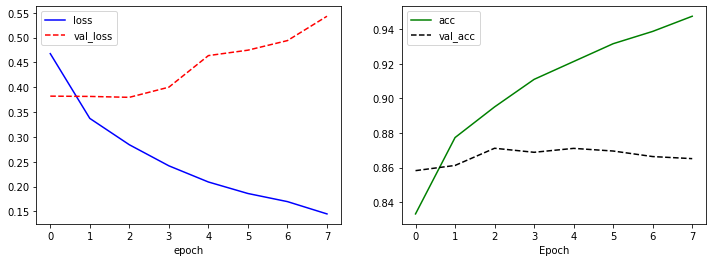

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.5907 - accuracy: 0.8604


[0.5906744599342346, 0.8604000210762024]

## 합성곱,풀링,드롭아웃 사용

In [ ]:
model=tf.keras.Sequential([
          tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32),
          tf.keras.layers.MaxPool2D(strides=(2,2),pool_size=(2,2)),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
          tf.keras.layers.AvgPool2D(strides=(2,2)),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=128,activation='relu'),
          tf.keras.layers.Dropout(rate=0.3),
          tf.keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
history = model.fit(train_x,train_y,
epochs=500,
validation_split=0.25,
callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5608 - accuracy: 0.7955 - val_loss: 0.4027 - val_accuracy: 0.8541
Epoch 2/500
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4029 - accuracy: 0.8559 - val_loss: 0.3607 - val_accuracy: 0.8646
Epoch 3/500
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3617 - accuracy: 0.8702 - val_loss: 0.3265 - val_accuracy: 0.8811
Epoch 4/500
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3361 - accuracy: 0.8787 - val_loss: 0.3251 - val_accuracy: 0.8799
Epoch 5/500
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3222 - accuracy: 0.8846 - val_loss: 0.3160 - val_accuracy: 0.8828
Epoch 6/500
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3100 - accuracy: 0.8886 - val_loss: 0.3116 - val_accuracy: 0.8916
Epoch 7/500
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2963 - accuracy: 0.8921 - val_loss: 0.3240 - val_ac

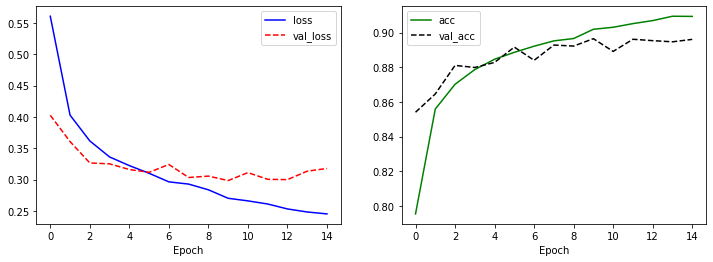

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3327 - accuracy: 0.8904


[0.3326622545719147, 0.8903999924659729]

- 실험1 : 0.5789939165115356, 0.8665000200271606
- 실험2 : 0.33033737540245056, 0.8906999826431274

## VGGNet

In [ ]:
model=tf.keras.Sequential([
          tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64,padding='same',activation='relu'),
          tf.keras.layers.MaxPool2D(strides=(2,2)),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256),
          tf.keras.layers.MaxPool2D(strides=(2,2)),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=512,activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(units=256,activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)        

In [ ]:
history = model.fit(train_x,train_y,
epochs=500,
validation_split=0.25,
callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 25s 17ms/step - loss: 0.5765 - accuracy: 0.7910 - val_loss: 0.3542 - val_accuracy: 0.8636
Epoch 2/500
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3947 - accuracy: 0.8556 - val_loss: 0.3121 - val_accuracy: 0.8831
Epoch 3/500
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3733 - accuracy: 0.8665 - val_loss: 0.2887 - val_accuracy: 0.8929
Epoch 4/500
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3584 - accuracy: 0.8710 - val_loss: 0.3011 - val_accuracy: 0.8915
Epoch 5/500
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3514 - accuracy: 0.8738 - val_loss: 0.2740 - val_accuracy: 0.8974
Epoch 6/500
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3471 - accuracy: 0.8772 - val_loss: 0.2799 - val_accuracy: 0.8994
Epoch 7/500
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3329 - accuracy: 0.8796 - val_loss: 0

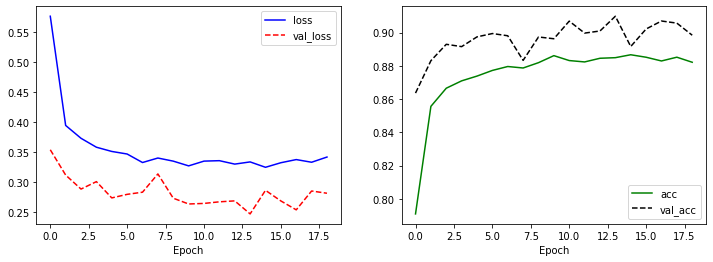

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.3032 - accuracy: 0.8916


[0.3032389283180237, 0.8916000127792358]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
image_generator = ImageDataGenerator(
rotation_range = 10,
zoom_range = 0.10,
shear_range = 0.5,
width_shift_range = 0.10,
height_shift_range = 0.10,
horizontal_flip = True,
vertical_flip = False)
augment_size=100
x_augment=image_generator.flow(x=np.tile(A=train_x[0].reshape(28,28),reps=100).reshape(-1,28,28,1),
                          y=np.zeros(augment_size),
                          batch_size=augment_size,
                          shuffle=False).next()[0]

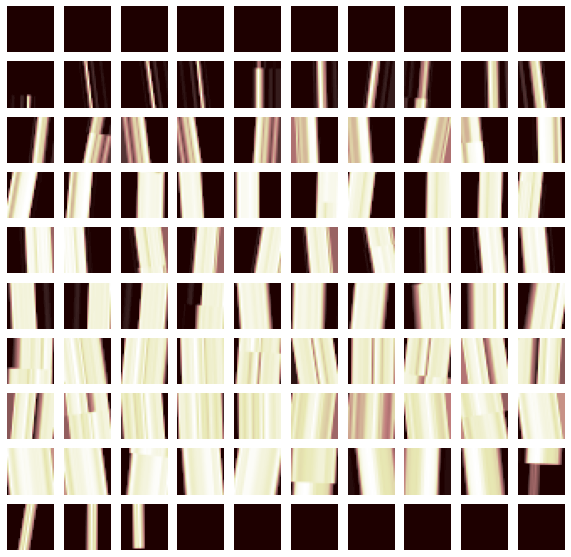

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augment[i].reshape(28,28), cmap='pink')
plt.show()

In [ ]:
augment_size=30000 #훈련데이터에서 30000개 추가 생성
#원본이미지 무작위 선택 및 복사
x_choice=np.random.choice(train_x.shape[0],size=augment_size,replace=False)
x_augmented=train_x[x_choice].copy()
y_augmented=train_y[x_choice].copy()
#복사된 이미지를 활용해 보강 이미지 데이터 생성
x_augmented=image_generator.flow(x_augmented,np.zeros(augment_size),
                                 batch_size=augment_size,shuffle=False).next()[0]
print(x_augmented.shape)

(30000, 28, 28, 1)


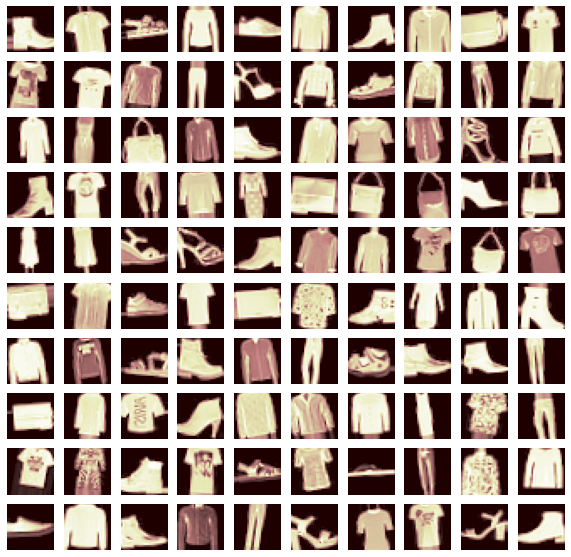

(90000, 28, 28, 1)


In [ ]:
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()
#데이터 합쳐주기
train_x = np.concatenate((train_x,x_augmented))
train_y = np.concatenate((train_y,y_augmented))
#보강 데이터 결합 확인
print(train_x.shape)

In [ ]:
#신경망 모델:vggnet 스타일 적용
model= tf.keras.Sequential([
tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
tf.keras.layers.MaxPool2D(strides = (2,2)),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
tf.keras.layers.MaxPool2D(strides = (2,2)),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=512, activation = 'relu'),
tf.keras.layers.Dropout(rate = 0.5),
tf.keras.layers.Dense(units=256, activation = 'relu'),
tf.keras.layers.Dropout(rate = 0.5),
tf.keras.layers.Dense(units=10, activation = 'softmax')
])
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
history = model.fit(train_x,train_y,
epochs=500,
validation_split=0.25,
callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10 , monitor = 'val_loss')])


Epoch 1/500
2110/2110 [==============================] - 38s 17ms/step - loss: 0.5865 - accuracy: 0.7849 - val_loss: 0.5719 - val_accuracy: 0.7786
Epoch 2/500
2110/2110 [==============================] - 36s 17ms/step - loss: 0.3872 - accuracy: 0.8588 - val_loss: 0.4929 - val_accuracy: 0.8108
Epoch 3/500
2110/2110 [==============================] - 36s 17ms/step - loss: 0.3468 - accuracy: 0.8749 - val_loss: 0.4498 - val_accuracy: 0.8322
Epoch 4/500
2110/2110 [==============================] - 36s 17ms/step - loss: 0.3221 - accuracy: 0.8863 - val_loss: 0.4467 - val_accuracy: 0.8294
Epoch 5/500
2110/2110 [==============================] - 36s 17ms/step - loss: 0.3036 - accuracy: 0.8907 - val_loss: 0.4132 - val_accuracy: 0.8498
Epoch 6/500
2110/2110 [==============================] - 36s 17ms/step - loss: 0.2963 - accuracy: 0.8945 - val_loss: 0.4179 - val_accuracy: 0.8471
Epoch 7/500
2110/2110 [==============================] - 36s 17ms/step - loss: 0.2943 - accuracy: 0.8941 - val_loss: 0

In [ ]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.2089 - accuracy: 0.9258


[0.20886267721652985, 0.9258000254631042]

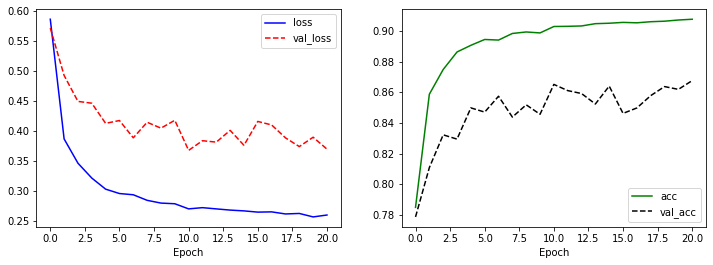

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()
